In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#### Load Dataset

In [2]:
df = pd.read_csv('dataset/train.csv')

### 1. Data Cleaning

##### Analyze data

In [3]:
# Check rows and columns
df.shape

(891, 12)

In [4]:
# Check datatypes of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Check for null values

In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Note:** Cabin has 687 null values while our total values are 891, so removed it from data

In [6]:
df = df.drop('Cabin', axis=1)

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [8]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

### Describe data

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Note:** As we cannot fill Age through mean or mode b/c age of persons may very on it, so remove it again from dataset

In [10]:
df = df.drop('Age',axis=1)

In [11]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

**Note:** Lets checked Embarked

In [12]:
df['Embarked'].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [13]:
df.shape

(891, 10)

In [14]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S


**Note:** Now drop null values, as we only have two null values so they don't effect our dataset

In [15]:
df.dropna(inplace=True)

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S


### Remove Unnecessary columns

**Note:** As we know that PassengerId, Name and Ticket doesnot tell us whether a person survive or not, so drop them from dataset

In [20]:

def remove_columns(df, columns_to_remove):
    """
    Remove specified columns from the DataFrame if they exist.
    
    Parameters:
    df (pd.DataFrame): The DataFrame from which columns will be removed.
    columns_to_remove (list of str): List of column names to remove.
    
    Returns:
    pd.DataFrame: The DataFrame with the specified columns removed.
    """
    # List of columns to remove
    columns_to_remove = [col for col in columns_to_remove if col in df.columns]
    
    # Drop the columns if they exist
    df = df.drop(columns=columns_to_remove, axis=1)
    
    return df

In [22]:
df = remove_columns(df, ['Name', 'Fare', 'PassengerId','Fare','Ticket'])

In [24]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'], dtype='object')

In [25]:
df.shape

(889, 6)

In [26]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked
0,0,3,male,1,0,S
1,1,1,female,1,0,C
2,1,3,female,0,0,S
3,1,1,female,1,0,S
4,0,3,male,0,0,S


### Data Visculization

# `Font Dicts For Different Purpose`

In [27]:
title_fontdict = {
    'fontsize': 20,
    'fontweight': 'bold',
    'family': 'serif',
    'color': 'darkblue',
    'verticalalignment': 'top'
}

xlabel_fontdict = {
    'fontsize': 14,
    'fontweight': 'medium',
    'family': 'sans-serif',
    'color': 'darkgreen',
    'horizontalalignment': 'right'
}

ylabel_fontdict = {
    'fontsize': 14,
    'fontweight': 'medium',
    'family': 'sans-serif',
    'color': 'darkred',
    'horizontalalignment': 'left'
}

ticklabel_fontdict = {
    'fontsize': 12,
    'fontweight': 'light',
    'family': 'monospace',
    'color': 'black'
}

legend_fontdict = {
    'fontsize': 12,
    'fontweight': 'normal',
    'family': 'serif',
    'color': 'purple'
}

grid_fontdict = {
    'fontsize': 10,
    'fontweight': 'light',
    'family': 'sans-serif',
    'color': 'gray'
}


**`Draw a pie chart that tell's us how many male and females are travelling in Titanic`**



In [28]:
g_counts = df['Sex'].value_counts()

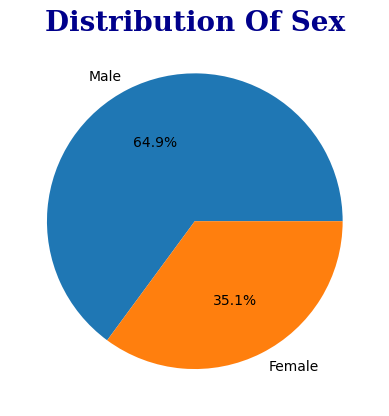

In [29]:
plt.pie(g_counts,labels=g_counts.index.str.title(), autopct='%1.1f%%')
plt.title("Distribution Of Sex", fontdict=title_fontdict)
plt.show()

In [30]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'], dtype='object')

#### Draw a bar chart that tells how many man and women survived

In [31]:
# Group by 'Sex' and sum 'Survived' to get the number of survivors by gender
survival_by_gender = df.groupby('Sex')['Survived'].sum()

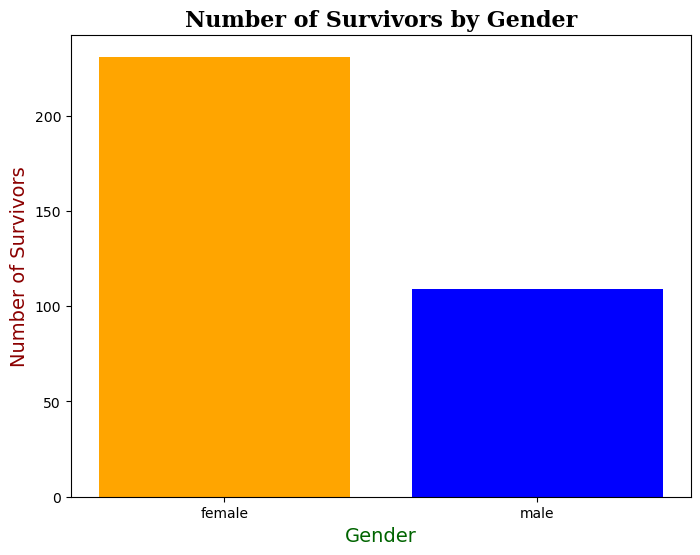

In [32]:
# Plotting
plt.figure(figsize=(8, 6))
plt.bar(survival_by_gender.index, survival_by_gender.values, color=['orange', 'blue'])

# Adding title and labels
plt.title('Number of Survivors by Gender', fontsize=16, fontweight='bold', family='serif')
plt.xlabel('Gender', fontdict=xlabel_fontdict)
plt.ylabel('Number of Survivors', fontdict=ylabel_fontdict)

# Show the plot
plt.show()

In [33]:
survival_by_gender

Sex
female    231
male      109
Name: Survived, dtype: int64

In [34]:
survival_by_gender.index

Index(['female', 'male'], dtype='object', name='Sex')

In [35]:
survival_by_gender.values

array([231, 109], dtype=int64)

In [36]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'], dtype='object')

#### Calculate Survived On the base Of Pclass

In [37]:
pclass_survived = df.groupby('Pclass')['Survived'].sum()

In [38]:
pclass_survived

Pclass
1    134
2     87
3    119
Name: Survived, dtype: int64

##### Draw bar chart showing this information

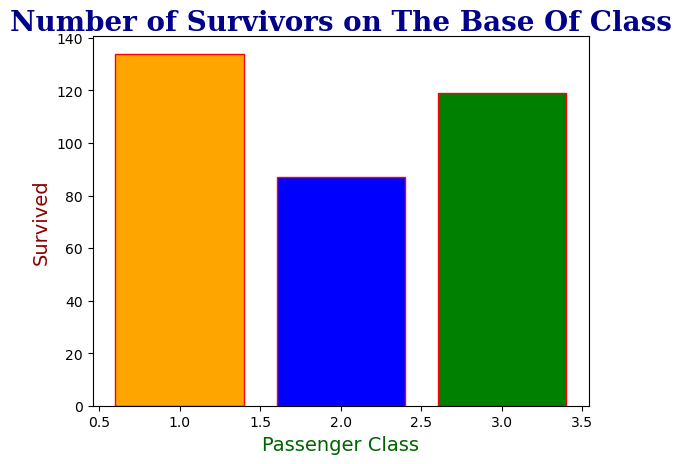

In [39]:
plt.bar(pclass_survived.index, pclass_survived.values, color=('orange','blue','green'), edgecolor='red', mouseover=True)
plt.title("Number of Survivors on The Base Of Class", fontdict=title_fontdict)
plt.xlabel("Passenger Class", fontdict=xlabel_fontdict)
plt.ylabel("Survived", fontdict=ylabel_fontdict)
plt.show()

In [40]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'], dtype='object')

In [41]:
# Group by 'Sex' and 'Pclass', then count occurrences
pclass_gender_counts = df.groupby(['Sex', 'Pclass']).size().unstack()

<Figure size 1000x700 with 0 Axes>

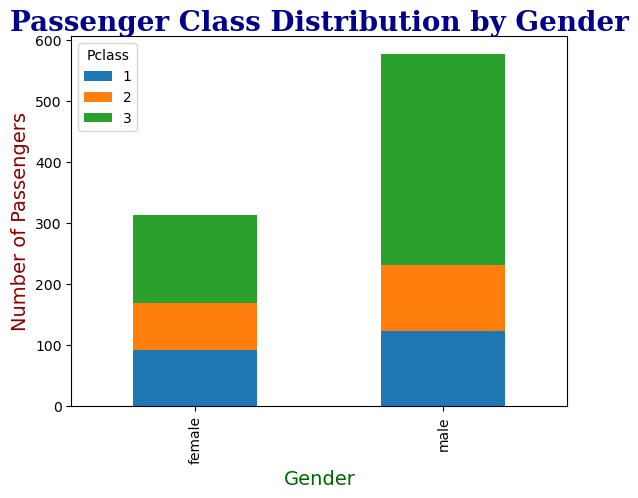

In [42]:
# Plotting
plt.figure(figsize=(10, 7))
pclass_gender_counts.plot(kind='bar', stacked=True)

# Adding title and labels
plt.title('Passenger Class Distribution by Gender', fontdict=title_fontdict)
plt.xlabel('Gender', fontdict=xlabel_fontdict)
plt.ylabel('Number of Passengers', fontdict=ylabel_fontdict)

# Show the plot
plt.show()

In [43]:
pclass_gender_counts

Pclass,1,2,3
Sex,,,
female,92,76,144
male,122,108,347


In [44]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'], dtype='object')

In [45]:
df['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 889, dtype: object

### Survival Rate On the Bases of Embarked

In [46]:
e_count = df['Embarked'].value_counts()

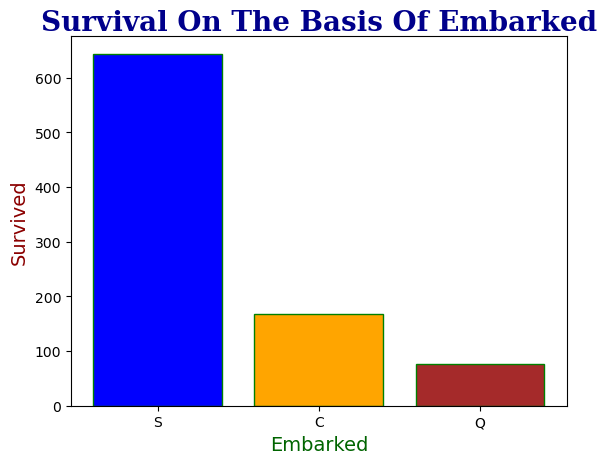

In [47]:
plt.bar(e_count.index, e_count.values,edgecolor='green',color=('blue','orange','brown'))
plt.title("Survival On The Basis Of Embarked", fontdict=title_fontdict)
plt.xlabel("Embarked", fontdict=xlabel_fontdict)
plt.ylabel("Survived", fontdict=ylabel_fontdict)
plt.show()

In [48]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'], dtype='object')

### Sibsp

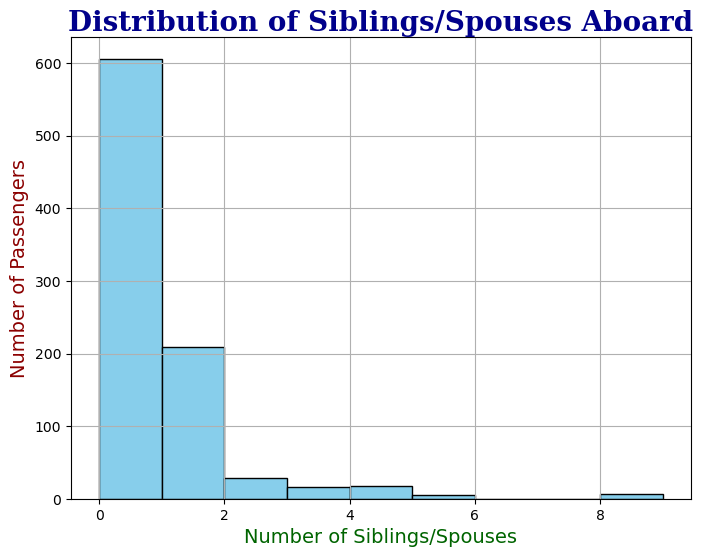

In [49]:
# Plotting histogram
plt.figure(figsize=(8, 6))
plt.hist(df['SibSp'], bins=range(df['SibSp'].min(), df['SibSp'].max() + 2), color='skyblue', edgecolor='black')
plt.title('Distribution of Siblings/Spouses Aboard', fontdict=title_fontdict)
plt.xlabel('Number of Siblings/Spouses', fontdict=xlabel_fontdict)
plt.ylabel('Number of Passengers', fontdict=ylabel_fontdict)
plt.grid(True)
plt.show()

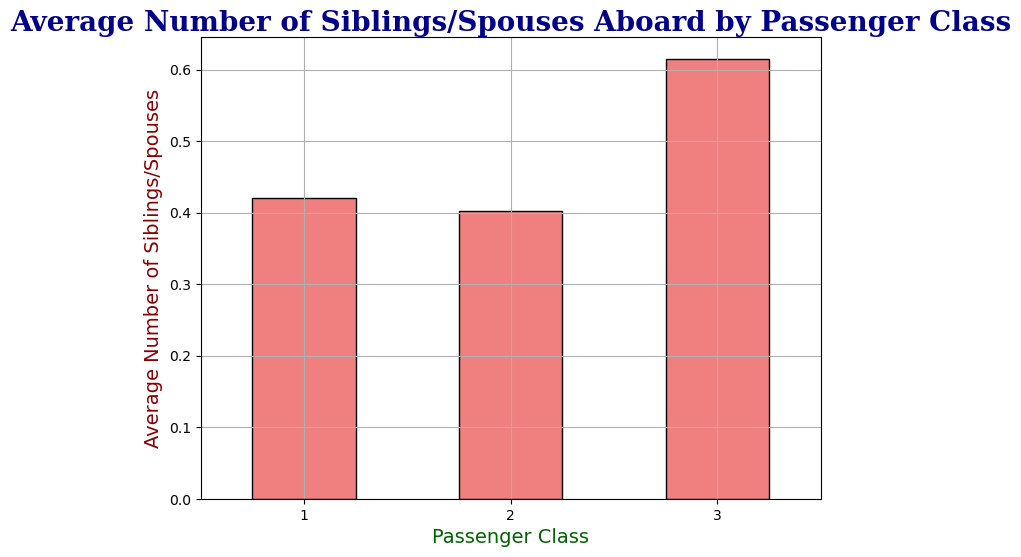

In [52]:
# Group by 'Pclass' and calculate average 'SibSp'
average_sibsp_by_pclass = df.groupby('Pclass')['SibSp'].mean()

# Plotting bar chart
plt.figure(figsize=(8, 6))
average_sibsp_by_pclass.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Average Number of Siblings/Spouses Aboard by Passenger Class', fontdict=title_fontdict)
plt.xlabel('Passenger Class', fontdict=xlabel_fontdict)
plt.ylabel('Average Number of Siblings/Spouses', fontdict=ylabel_fontdict)
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

<Figure size 800x600 with 0 Axes>

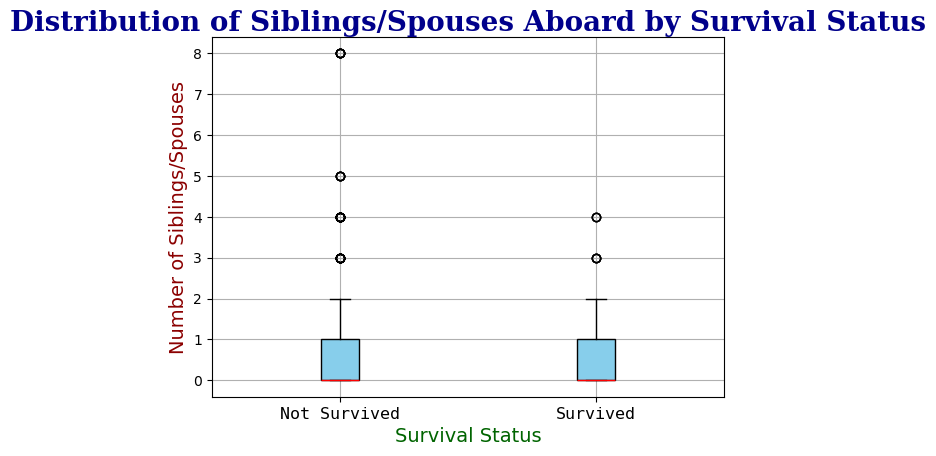

In [55]:
# Plotting box plot
plt.figure(figsize=(8, 6))
df.boxplot(column='SibSp', by='Survived', grid=False, color='darkblue', patch_artist=True,
           boxprops=dict(facecolor='skyblue', color='black'),
           whiskerprops=dict(color='black'),
           capprops=dict(color='black'),
           medianprops=dict(color='red'))
plt.title('Distribution of Siblings/Spouses Aboard by Survival Status', fontdict=title_fontdict)
plt.suptitle('')  # Remove default title
plt.xlabel('Survival Status', fontdict=xlabel_fontdict)
plt.ylabel('Number of Siblings/Spouses', fontdict=ylabel_fontdict)
plt.xticks([1, 2], ['Not Survived', 'Survived'], fontdict=ticklabel_fontdict)
plt.grid(True)
plt.show()